In [1]:
#Gold ETF stock price prediction

In [2]:
#!pip install tensorflow
#!pip install keras
#!pip install pandas-datareader
import tensorflow
import keras
#!pip install pandas
import pandas
import numpy

In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 7, 31)

In [5]:
###axisgold = web.DataReader("AXISGOLD.NS", 'yahoo', start, end)
###bslgoldetf = web.DataReader("BSLGOLDETF.NS", 'yahoo', start, end)
#cangold = web.DataReader("CANGOLD.BO", 'yahoo', start, end)
#hfcmgetf = web.DataReader("HFCMFGETF.BO", 'yahoo', start, end)
#ipgetf = web.DataReader("IPGETF.BO", 'yahoo', start, end)
###idbigold = web.DataReader("IDBIGOLD.NS", 'yahoo', start, end)
#kotakgold = web.DataReader("KOTAKGOLD.NS", 'yahoo', start, end)
###qgoldhalf = web.DataReader("QGOLDHALF.NS", 'yahoo', start, end)
#relgold = web.DataReader("RELGOLD.BO", 'yahoo', start, end)
#religarego = web.DataReader("RELIGAREGO.BO", 'yahoo', start, end)
#setfgold = web.DataReader("SETFGOLD.NS", 'yahoo', start, end)
###goldshare = web.DataReader("GOLDSHARE.NS", 'yahoo', start, end)
###goldbees = web.DataReader("GOLDBEES.NS", 'yahoo', start, end)
gld = web.DataReader("GLD", 'yahoo', start, end)

In [6]:
##kotakgold = pd.read_csv('GLD.csv')
###axisgold.to_csv('AXISGOLD.csv')
###bslgoldetf.to_csv('BSLGOLDETF.csv')
###idbigold.to_csv('IDBIGOLD.csv')
#kotakgold.to_csv('KOTAKGOLD.csv')
###qgoldhalf.to_csv('QGOLDHALF.csv')
#setfgold.to_csv('SETFGOLD.csv')
####goldshare.to_csv('GOLDSHARE.csv')
###goldbees.to_csv('GOLDBEES.csv')
gld.to_csv('GLD.csv')


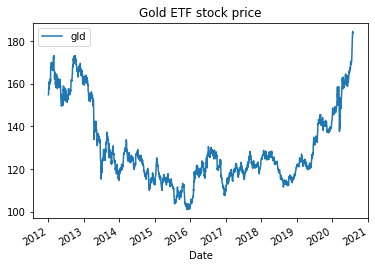

In [7]:
###axisgold['Open'].plot(label = 'axisgold', figsize= (15,7))
###bslgoldetf['Open'].plot(label = 'bslgoldetf')
###idbigold['Open'].plot(label = 'idbigold')
#kotakgold['Open'].plot(label = 'kotakgold')
###qgoldhalf['Open'].plot(label = 'qgoldhalf')
###goldshare['Open'].plot(label = 'goldshare')
###goldbees['Open'].plot(label = 'goldbees')
gld['Open'].plot(label = 'gld')

plt.title('Gold ETF stock price')
plt.legend()

In [8]:
#We are going to predict the price of one Gold ETF below. Similarly all other predictions can also be made. Let us chose Axisgold ETF

In [9]:
# Select Adjusted close data
data = gld[['Adj Close']]
print(data.shape)
data[-20:]

(2159, 1)


,Adj Close
Date,
2020-07-06,167.979996
2020-07-07,169.039993
2020-07-08,170.089996
2020-07-09,169.630005
2020-07-10,169.190002
2020-07-13,169.399994
2020-07-14,170.190002
2020-07-15,170.339996
2020-07-16,168.729996


In [10]:
#Data preporcesing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(np.array(data).reshape(-1,1))

In [11]:
print(data_scaled)

[[0.65253742]
 [0.6618393 ]
 [0.67443782]
 ...
 [0.99646782]
 [0.98033677]
 [1.        ]]


In [12]:
#Split data 80% training 20% testing

training_size=int(len(data_scaled)*0.8)
test_size=len(data_scaled)-training_size
train_data,test_data=data_scaled[0:training_size],data_scaled[training_size:len(data)]

In [13]:
training_size,test_size

(1727, 432)

In [14]:
train_data

array([[0.65253742],
       [0.6618393 ],
       [0.67443782],
       ...,
       [0.18285647],
       [0.17991287],
       [0.1646062 ]])

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
#Regression coefficients
x_train_lr = x_train
y_train_lr = y_train
x_test_lr = x_test
y_test_lr = y_test

In [18]:
x_train_lr

array([[0.65253742],
       [0.6618393 ],
       [0.67443782],
       ...,
       [0.18685982],
       [0.18297424],
       [0.18285647]])

In [19]:
x_train_lr =x_train_lr.reshape(x_train_lr.shape[0], 1)
x_test_lr = x_test_lr.reshape(x_test_lr.shape[0], 1)
y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)

In [20]:
x_train_lr=scaler.inverse_transform(x_train_lr)
x_test_lr=scaler.inverse_transform(x_test_lr)
y_train_lr=scaler.inverse_transform(y_train_lr)
y_test_lr=scaler.inverse_transform(y_test_lr)

In [21]:
x_train_lr

array([[155.91999817],
       [156.71000671],
       [157.77999878],
       ...,
       [116.37000275],
       [116.04000092],
       [116.02999878]])

In [22]:
y_train_lr

array([[156.71000671],
       [157.77999878],
       [157.19999695],
       ...,
       [116.04000092],
       [116.02999878],
       [115.77999878]])

In [23]:
print(x_train_lr.shape), print(y_train_lr.shape)

(1725, 1)
(1725, 1)


(None, None)

In [24]:
print(x_test_lr.shape), print(y_test_lr.shape)


(430, 1)
(430, 1)


(None, None)

In [25]:
x_train_lr.shape, x_test_lr.shape

((1725, 1), (430, 1))

In [26]:
x_train_lr

array([[155.91999817],
       [156.71000671],
       [157.77999878],
       ...,
       [116.37000275],
       [116.04000092],
       [116.02999878]])

In [27]:
#Create models
#Create decision tree model
#modeltree = DecisionTreeRegressor()
#modeltree.fit(x_train, y_train)

#Create linear decision model
modellr = LinearRegression()
modellr.fit(x_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(modellr.coef_)))
# The Intercept
print('Intercept: ', modellr.intercept_)

Slope:  0.9968814488260848
Intercept:  [0.37395021]


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


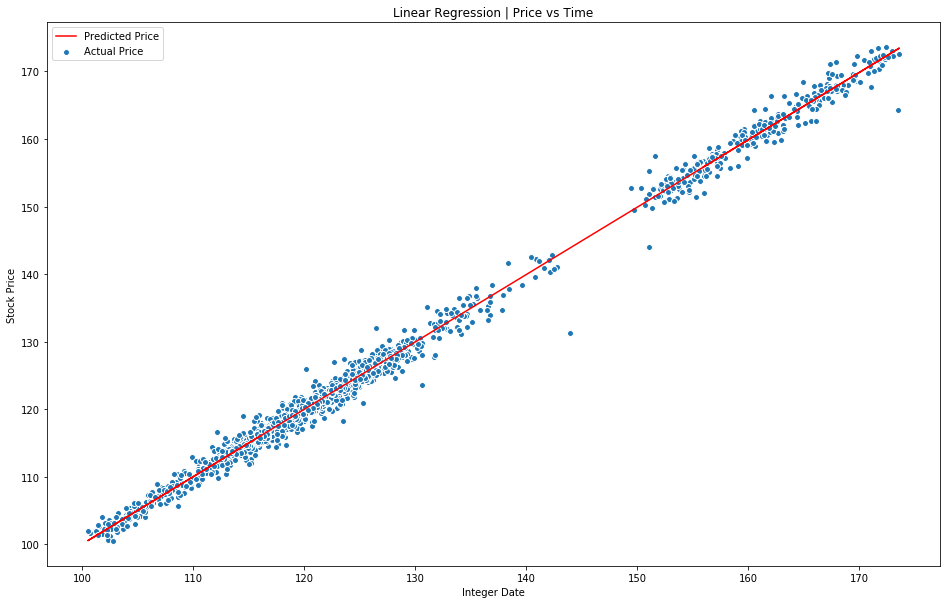

In [29]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(x_train_lr, y_train_lr, edgecolor='w', label='Actual Price')
plt.plot(x_train_lr, modellr.predict(x_train_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [30]:
# Create test arrays
x_test_lr

array([[113.66000366],
       [113.69999695],
       [114.63999939],
       [114.76999664],
       [115.62000275],
       [115.66999817],
       [115.66999817],
       [115.86000061],
       [115.76999664],
       [115.63999939],
       [114.94999695],
       [115.37999725],
       [115.73999786],
       [115.54000092],
       [116.41000366],
       [117.12000275],
       [117.13999939],
       [118.08999634],
       [117.68000031],
       [117.54000092],
       [117.79000092],
       [117.52999878],
       [117.05999756],
       [117.87000275],
       [118.15000153],
       [117.43000031],
       [119.23999786],
       [118.72000122],
       [120.01999664],
       [119.66000366],
       [120.56999969],
       [121.05999756],
       [121.25      ],
       [121.33000183],
       [122.43000031],
       [121.44000244],
       [121.86000061],
       [121.52999878],
       [122.30999756],
       [121.58999634],
       [121.80000305],
       [122.08999634],
       [121.87999725],
       [122

In [31]:
# Generate array with predicted values
train_pred_lr = modellr.predict(x_train_lr)
test_pred_lr = modellr.predict(x_test_lr)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#train_pred_lr =train_pred_lr.reshape(train_pred_lr.shape[0], 1)
#test_pred_lr = test_pred_lr.reshape(test_pred_lr.shape[0], 1)

In [33]:
# train_pred_lr=scaler.inverse_transform(train_pred_lr)
# test_pred_lr=scaler.inverse_transform(test_pred_lr)

In [34]:
#x_train_lr =x_train_lr.reshape(x_train_lr.shape[0], 1)
#x_test_lr = x_test_lr.reshape(x_test_lr.shape[0], 1)

In [35]:
#x_train_lr=scaler.inverse_transform(x_train_lr)
#x_test_lr=scaler.inverse_transform(x_test_lr)

In [36]:
print(x_train_lr)
print(train_pred_lr)

[[155.91999817]
 [156.71000671]
 [157.77999878]
 ...
 [116.37000275]
 [116.04000092]
 [116.02999878]]
[[155.80770388]
 [156.59524874]
 [157.66190398]
 ...
 [116.38104714]
 [116.05207444]
 [116.0421035 ]]


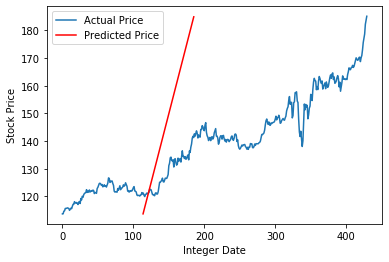

In [37]:
plt.plot(x_test_lr, label='Actual Price')
plt.plot(x_test_lr, modellr.predict(x_test_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

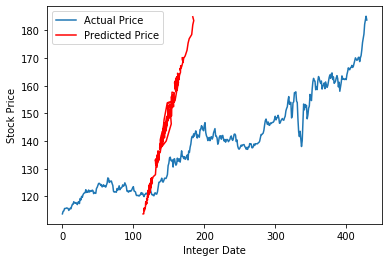

In [38]:
plt.plot(y_test_lr, label='Actual Price')
plt.plot(y_test_lr, modellr.predict(x_test_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [39]:
print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(x_test_lr, modellr.predict(x_test_lr)))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(x_test_lr, modellr.predict(x_test_lr))))

print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lr, modellr.predict(x_test_lr)))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lr, modellr.predict(x_test_lr))))


Test Linear Regression Root Mean Squared error is:0.07831385105838047
Test Linear Regression Mean Squared error is 0.006133059267594201
Test Linear Regression Root Mean Squared error is:1.376629879636552
Test Linear Regression Mean Squared error is 1.8951098255081473


In [40]:
#plt.plot(y_test_lr)
#plt.plot(test_pred_lr)
#plt.plot(y_train_lr)
#plt.plot(train_pred_lr)

In [41]:
#y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
#y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)
#y_train_lr=scaler.inverse_transform(y_train_lr)
#   y_test_lr=scaler.inverse_transform(y_test_lr)

In [42]:
print(x_test_lr.shape) 
print(train_pred_lr.shape)
print(x_train_lr.shape)
print(test_pred_lr.shape)

(430, 1)
(1725, 1)
(1725, 1)
(430, 1)


In [43]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("Training Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train_lr,train_pred_lr))))
print("Training Linear Regression Mean Squared error is {}".format(mean_squared_error(y_train_lr,train_pred_lr)))

print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lr, test_pred_lr))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lr, test_pred_lr)))


Training Linear Regression Root Mean Squared error is:1.2304862888821695
Training Linear Regression Mean Squared error is 1.514096507127014
Test Linear Regression Root Mean Squared error is:1.376629879636552
Test Linear Regression Mean Squared error is 1.8951098255081473


In [44]:
print(r2_score(y_train_lr, train_pred_lr))
print(r2_score(y_test_lr, test_pred_lr))

0.9950548382902809
0.9927659175502962


In [45]:
###LSTM CODE BELOW

In [46]:
#LSTM coefficients
x_train_lstm = x_train
y_train_lstm = y_train
x_test_lstm = x_test
y_test_lstm = y_test

In [47]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train_lstm =x_train_lstm.reshape(x_train_lstm.shape[0],x_train_lstm.shape[1] , 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0],x_test_lstm.shape[1] , 1)

In [48]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Activation
from sklearn.metrics import r2_score


In [49]:
def model_funt(layer):
        model_1=Sequential()
        model_1.add(LSTM(layer[0],return_sequences=True,input_shape=(5,1)))
        model_1.add(Dropout(0.3))
        #model.add(LSTM(100,return_sequences=True))
        #model.add(Dropout(0.5))
        #model.add(LSTM(100,return_sequences=True))
        #model.add(Dropout(0.5))
        model_1.add(LSTM(layer[1]))
        #model.add(Dropout(0.5))
        model_1.add(Dense(layer[2]))
        model_1.add(Activation("linear"))
        #model_1.compile(loss='mse',optimizer='adam')
        
        return model_1

In [50]:
# def model_funt(layer):
#     model_1 = Sequential()
#     model_1.add(LSTM(layer[0], input_dim=x_train_lstm.shape[1], activation='relu'))
#     model_1.add(Dropout(0.3))
#     model_1.add(Dense(layer[1], activation='relu'))
#     model_1.add(Dense(layer[2], activation='linear'))
#     return model_1

Epoch 1/50
27/27 [==============================] - 1s 33ms/step - loss: 0.0786 - accuracy: 5.7971e-04 - val_loss: 0.1171 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 5.7971e-04 - val_loss: 0.0879 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 5.7971e-04 - val_loss: 0.0645 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 5.7971e-04 - val_loss: 0.0469 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 5.7971e-04 - val_loss: 0.0345 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 5.7971e-04 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 5.7971e-04 - val_los

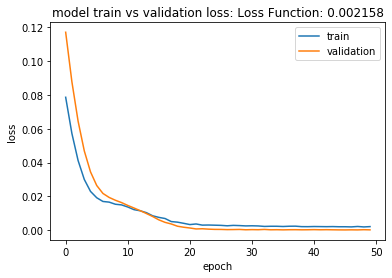

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0799 - accuracy: 5.7971e-04 - val_loss: 0.1202 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 5.7971e-04 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 5.7971e-04 - val_loss: 0.0695 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 5.7971e-04 - val_loss: 0.0510 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 5.7971e-04 - val_loss: 0.0371 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 5.7971e-04 - val_loss: 0.0274 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 5.7971e-04 - val_los

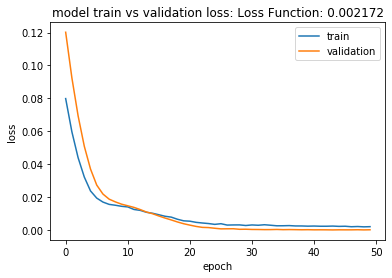

Epoch 1/50
27/27 [==============================] - 1s 32ms/step - loss: 0.0748 - accuracy: 5.7971e-04 - val_loss: 0.1111 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 5.7971e-04 - val_loss: 0.0830 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 5.7971e-04 - val_loss: 0.0608 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 5.7971e-04 - val_loss: 0.0441 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 5.7971e-04 - val_loss: 0.0321 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 5.7971e-04 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 5.7971e-04 - val_los

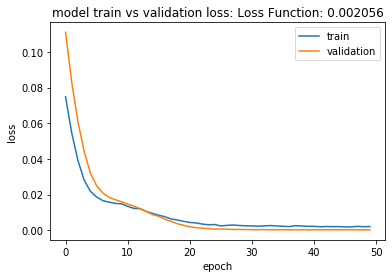

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0817 - accuracy: 5.7971e-04 - val_loss: 0.1248 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 5.7971e-04 - val_loss: 0.0983 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 5.7971e-04 - val_loss: 0.0746 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 5.7971e-04 - val_loss: 0.0538 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 5.7971e-04 - val_loss: 0.0372 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 5.7971e-04 - val_loss: 0.0259 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 5.7971e-04 - val_los

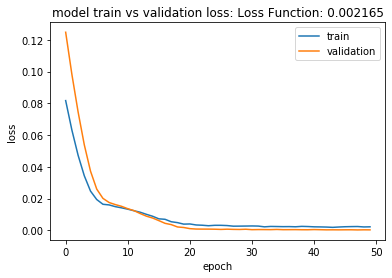

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0809 - accuracy: 5.7971e-04 - val_loss: 0.1226 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 5.7971e-04 - val_loss: 0.0969 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 5.7971e-04 - val_loss: 0.0761 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 5.7971e-04 - val_loss: 0.0593 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 5.7971e-04 - val_loss: 0.0463 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 5.7971e-04 - val_loss: 0.0366 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 5.7971e-04 - val_los

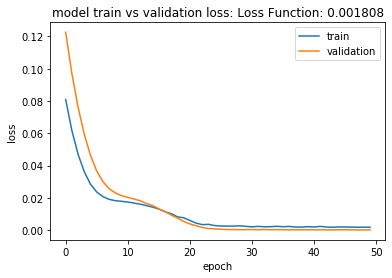

Epoch 1/50
27/27 [==============================] - 1s 42ms/step - loss: 0.0823 - accuracy: 5.7971e-04 - val_loss: 0.1265 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 5.7971e-04 - val_loss: 0.1042 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 5.7971e-04 - val_loss: 0.0857 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 5.7971e-04 - val_loss: 0.0703 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 5.7971e-04 - val_loss: 0.0577 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 5.7971e-04 - val_loss: 0.0476 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 5.7971e-04 - val_los

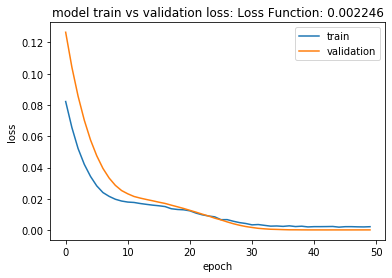

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.0776 - accuracy: 5.7971e-04 - val_loss: 0.1142 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 5.7971e-04 - val_loss: 0.0808 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 5.7971e-04 - val_loss: 0.0503 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 5.7971e-04 - val_loss: 0.0267 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 5.7971e-04 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 5.7971e-04 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 5.7971e-04 - val_los

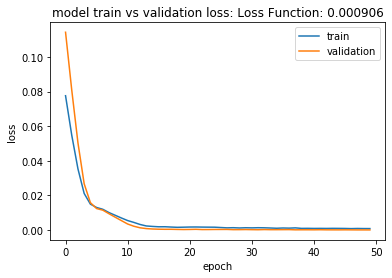

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.0773 - accuracy: 5.7971e-04 - val_loss: 0.1152 - val_accuracy: 0.0000e+00
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 5.7971e-04 - val_loss: 0.0866 - val_accuracy: 0.0000e+00
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 5.7971e-04 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 5.7971e-04 - val_loss: 0.0436 - val_accuracy: 0.0000e+00
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 5.7971e-04 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 5.7971e-04 - val_loss: 0.0223 - val_accuracy: 0.0000e+00
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 5.7971e-04 - val_los

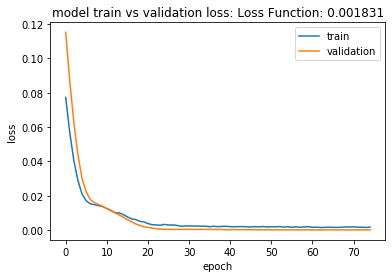

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.0716 - accuracy: 5.7971e-04 - val_loss: 0.1043 - val_accuracy: 0.0000e+00
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 5.7971e-04 - val_loss: 0.0743 - val_accuracy: 0.0000e+00
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 5.7971e-04 - val_loss: 0.0516 - val_accuracy: 0.0000e+00
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 5.7971e-04 - val_loss: 0.0358 - val_accuracy: 0.0000e+00
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 5.7971e-04 - val_loss: 0.0259 - val_accuracy: 0.0000e+00
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 5.7971e-04 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 5.7971e-04 - val_los

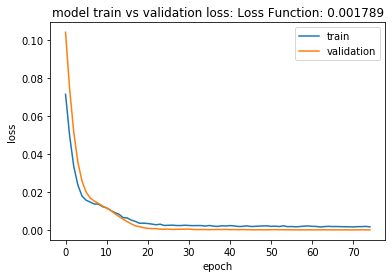

Epoch 1/75
27/27 [==============================] - 1s 32ms/step - loss: 0.0808 - accuracy: 5.7971e-04 - val_loss: 0.1240 - val_accuracy: 0.0000e+00
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 5.7971e-04 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 5.7971e-04 - val_loss: 0.0790 - val_accuracy: 0.0000e+00
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 5.7971e-04 - val_loss: 0.0612 - val_accuracy: 0.0000e+00
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 5.7971e-04 - val_loss: 0.0465 - val_accuracy: 0.0000e+00
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 5.7971e-04 - val_loss: 0.0353 - val_accuracy: 0.0000e+00
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 5.7971e-04 - val_los

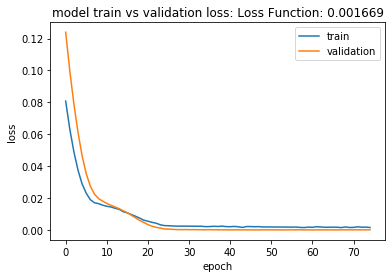

Epoch 1/75
27/27 [==============================] - 1s 31ms/step - loss: 0.0799 - accuracy: 5.7971e-04 - val_loss: 0.1159 - val_accuracy: 0.0000e+00
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 5.7971e-04 - val_loss: 0.0810 - val_accuracy: 0.0000e+00
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 5.7971e-04 - val_loss: 0.0555 - val_accuracy: 0.0000e+00
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 5.7971e-04 - val_loss: 0.0383 - val_accuracy: 0.0000e+00
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 5.7971e-04 - val_loss: 0.0285 - val_accuracy: 0.0000e+00
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 5.7971e-04 - val_loss: 0.0234 - val_accuracy: 0.0000e+00
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 5.7971e-04 - val_los

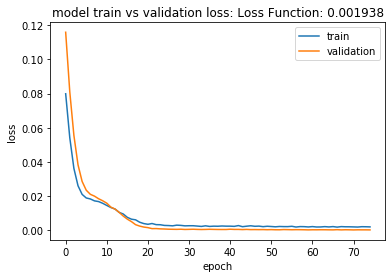

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.0814 - accuracy: 5.7971e-04 - val_loss: 0.1264 - val_accuracy: 0.0000e+00
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 5.7971e-04 - val_loss: 0.1050 - val_accuracy: 0.0000e+00
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 5.7971e-04 - val_loss: 0.0859 - val_accuracy: 0.0000e+00
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 5.7971e-04 - val_loss: 0.0689 - val_accuracy: 0.0000e+00
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 5.7971e-04 - val_loss: 0.0539 - val_accuracy: 0.0000e+00
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 5.7971e-04 - val_loss: 0.0416 - val_accuracy: 0.0000e+00
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 5.7971e-04 - val_los

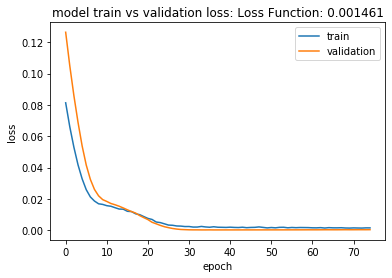

Epoch 1/75
27/27 [==============================] - 1s 31ms/step - loss: 0.0814 - accuracy: 5.7971e-04 - val_loss: 0.1236 - val_accuracy: 0.0000e+00
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 5.7971e-04 - val_loss: 0.0973 - val_accuracy: 0.0000e+00
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 5.7971e-04 - val_loss: 0.0764 - val_accuracy: 0.0000e+00
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 5.7971e-04 - val_loss: 0.0601 - val_accuracy: 0.0000e+00
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 5.7971e-04 - val_loss: 0.0476 - val_accuracy: 0.0000e+00
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 5.7971e-04 - val_loss: 0.0381 - val_accuracy: 0.0000e+00
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 5.7971e-04 - val_los

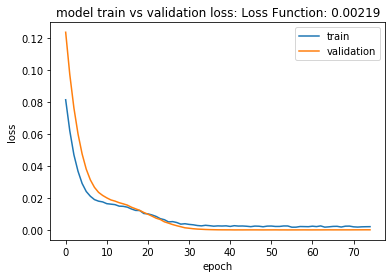

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.0824 - accuracy: 5.7971e-04 - val_loss: 0.1207 - val_accuracy: 0.0000e+00
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 5.7971e-04 - val_loss: 0.0847 - val_accuracy: 0.0000e+00
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 5.7971e-04 - val_loss: 0.0559 - val_accuracy: 0.0000e+00
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 5.7971e-04 - val_loss: 0.0337 - val_accuracy: 0.0000e+00
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 5.7971e-04 - val_loss: 0.0218 - val_accuracy: 0.0000e+00
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 5.7971e-04 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 5.7971e-04 - val_los

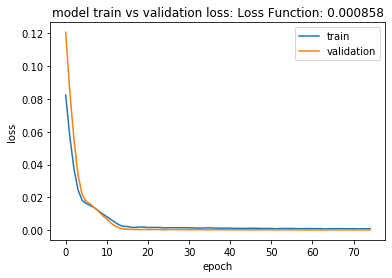

Epoch 1/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0777 - accuracy: 5.7971e-04 - val_loss: 0.1136 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 5.7971e-04 - val_loss: 0.0816 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 5.7971e-04 - val_loss: 0.0571 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 5.7971e-04 - val_loss: 0.0399 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 5.7971e-04 - val_loss: 0.0287 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 5.7971e-04 - val_loss: 0.0225 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 5.7971e-04 - 

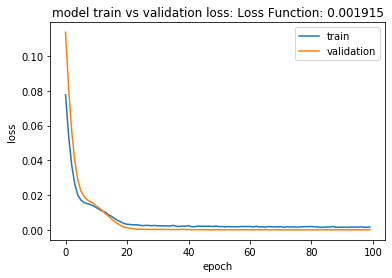

Epoch 1/100
27/27 [==============================] - 1s 39ms/step - loss: 0.0812 - accuracy: 5.7971e-04 - val_loss: 0.1207 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 5.7971e-04 - val_loss: 0.0907 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 5.7971e-04 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 5.7971e-04 - val_loss: 0.0508 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 5.7971e-04 - val_loss: 0.0390 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 5.7971e-04 - val_loss: 0.0313 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 5.7971e-04 - 

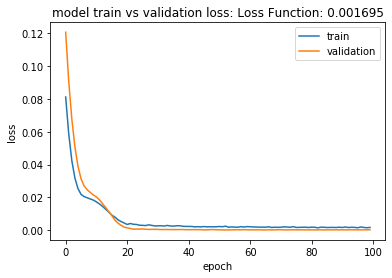

Epoch 1/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0788 - accuracy: 5.7971e-04 - val_loss: 0.1201 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 5.7971e-04 - val_loss: 0.0947 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 5.7971e-04 - val_loss: 0.0726 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 5.7971e-04 - val_loss: 0.0539 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 5.7971e-04 - val_loss: 0.0394 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 5.7971e-04 - val_loss: 0.0292 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 5.7971e-04 - 

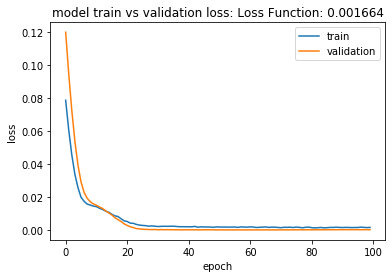

Epoch 1/100
27/27 [==============================] - 1s 52ms/step - loss: 0.0760 - accuracy: 5.7971e-04 - val_loss: 0.1107 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 5.7971e-04 - val_loss: 0.0795 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 5.7971e-04 - val_loss: 0.0555 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 5.7971e-04 - val_loss: 0.0380 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 5.7971e-04 - val_loss: 0.0268 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 5.7971e-04 - val_loss: 0.0203 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 5.7971e-04 - 

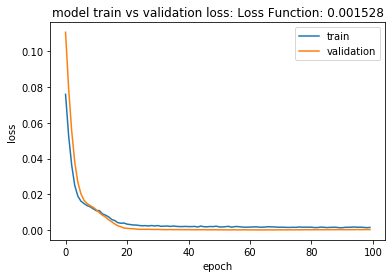

Epoch 1/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0828 - accuracy: 5.7971e-04 - val_loss: 0.1291 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 5.7971e-04 - val_loss: 0.1084 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 5.7971e-04 - val_loss: 0.0897 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 5.7971e-04 - val_loss: 0.0725 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 5.7971e-04 - val_loss: 0.0576 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 5.7971e-04 - val_loss: 0.0444 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 5.7971e-04 - 

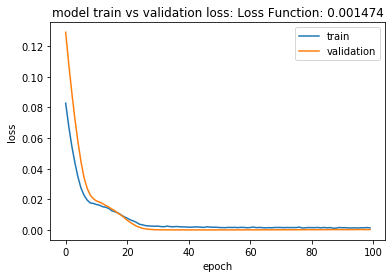

Epoch 1/100
27/27 [==============================] - 1s 52ms/step - loss: 0.0810 - accuracy: 5.7971e-04 - val_loss: 0.1270 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 5.7971e-04 - val_loss: 0.1081 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 5.7971e-04 - val_loss: 0.0914 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 5.7971e-04 - val_loss: 0.0764 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 5.7971e-04 - val_loss: 0.0638 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 5.7971e-04 - val_loss: 0.0527 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 5.7971e-04 - 

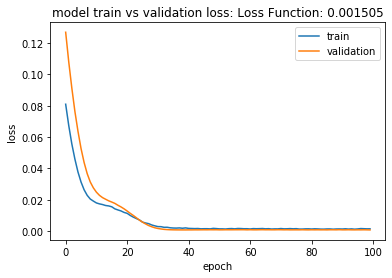

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.0736 - accuracy: 5.7971e-04 - val_loss: 0.1031 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 5.7971e-04 - val_loss: 0.0644 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 5.7971e-04 - val_loss: 0.0362 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 5.7971e-04 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 5.7971e-04 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 5.7971e-04 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 5.7971e-04 - 

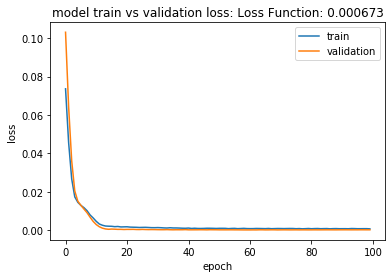

In [51]:
#best_model = None
#model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),epochs=50,batch_size=64,verbose=1)
epochs =[50, 75, 100]
# layers = [[4,1], [5,1], [7,1], [6,1], [,1]]

layers = [[4,5,1], [4,4,1], [4,3,1], [4,6,1], [4,2,1], [4,1,1], [10,10,1]]
model = 1
final_model = None
max = -100000
for epoch in epochs:
    for layer in layers:
        model_1 = model_funt(layer)
        model_1.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['accuracy'])
        history = model_1.fit(x_train_lstm, y_train_lstm, validation_data=(x_test_lstm,y_test_lstm), epochs=epoch,batch_size=64,verbose=1)
        train_pred_lstm = model_1.predict(x_train_lstm)
        print (model, " mean is: ", np.mean(train_pred_lstm), " variance is: ", np.var(train_pred_lstm))
        if(max < (r2_score(y_train_lstm, train_pred_lstm))):
            max = r2_score(y_train_lstm, train_pred_lstm)
            final_model = model_1
            final_epoch = epoch
            final_layers = layers
        
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model train vs validation loss')
        plt.title('model train vs validation loss: Loss Function: ' + str(round(history.history['loss'][-1], 6)))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()

        # Use the last loss as the title
        #plt.title('model train vs validation loss: Loss Function: ' + str(round(history.history['loss'][-1], 6)))
       # plt.show()

In [52]:
final_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 5, 10)             480       
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 10)             0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_13 (Activation)   (None, 1)                 0         
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


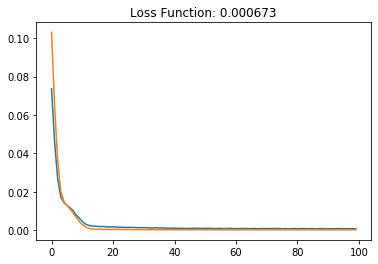

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function: ' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [54]:
print(final_layers)
print(final_epoch)

[[4, 5, 1], [4, 4, 1], [4, 3, 1], [4, 6, 1], [4, 2, 1], [4, 1, 1], [10, 10, 1]]
75


In [55]:
### Lets Do the prediction and check performance metrics
train_pred_lstm=final_model.predict(x_train_lstm)
test_pred_lstm=final_model.predict(x_test_lstm)

In [56]:
##Transformback to original form
train_pred_lstm=scaler.inverse_transform(train_pred_lstm)
test_pred_lstm=scaler.inverse_transform(test_pred_lstm)


In [57]:
# reshape input to be [samples, time steps, features] which is required for LSTM
y_train_lstm =y_train_lstm.reshape(y_train_lstm.shape[0], 1)
y_test_lstm = y_test_lstm.reshape(y_test_lstm.shape[0], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0], 1)

y_train_lstm=scaler.inverse_transform(y_train_lstm)
y_test_lstm=scaler.inverse_transform(y_test_lstm)
x_test_lstm=scaler.inverse_transform(x_test_lstm)

In [58]:
##print(y_test_lstm)
test_pred_lstm
#scaler.inverse_transform(data_scaled)

array([[114.14442 ],
       [114.18355 ],
       [115.10555 ],
       [115.233376],
       [116.07091 ],
       [116.12027 ],
       [116.12027 ],
       [116.30793 ],
       [116.21902 ],
       [116.09065 ],
       [115.41047 ],
       [115.83412 ],
       [116.189384],
       [115.99195 ],
       [116.852   ],
       [117.556076],
       [117.57593 ],
       [118.52098 ],
       [118.112724],
       [117.97346 ],
       [118.2222  ],
       [117.96352 ],
       [117.49649 ],
       [118.30185 ],
       [118.58079 ],
       [117.86408 ],
       [119.66917 ],
       [119.14945 ],
       [120.45033 ],
       [120.08956 ],
       [121.002235],
       [121.49462 ],
       [121.68574 ],
       [121.766235],
       [122.8746  ],
       [121.87694 ],
       [122.299904],
       [121.96753 ],
       [122.75355 ],
       [122.02794 ],
       [122.23945 ],
       [122.5317  ],
       [122.32005 ],
       [122.7132  ],
       [122.55187 ],
       [121.454414],
       [121.887   ],
       [121.7

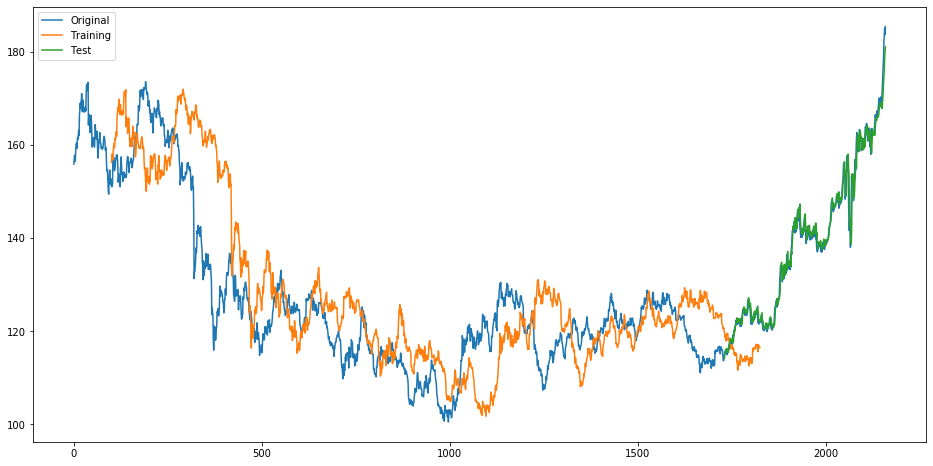

In [59]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred_lstm)+look_back, :] = train_pred_lstm
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred_lstm)+(look_back*2)-196:len(data)+100, :] = test_pred_lstm
# plot baseline and predictions
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()

In [60]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("Training Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train_lstm,train_pred_lstm))))
print("Traning Linear Regression Mean Squared error is {}".format(mean_squared_error(y_train_lstm,train_pred_lstm)))

Training Linear Regression Root Mean Squared error is:1.3394455333063304
Traning Linear Regression Mean Squared error is 1.79411433669428


In [61]:
### Test Data RMSE
print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lstm,test_pred_lstm))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lstm,test_pred_lstm)))


Test Linear Regression Root Mean Squared error is:1.5131598635677945
Test Linear Regression Mean Squared error is 2.2896527727125062


In [62]:
print(r2_score(y_train_lstm, train_pred_lstm))
print(r2_score(y_test_lstm, test_pred_lstm))

0.994140277400472
0.9912598538005291


In [63]:
test_pred_lstm =test_pred_lstm.reshape(test_pred_lstm.shape[0], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0], 1)
# y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
# y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)

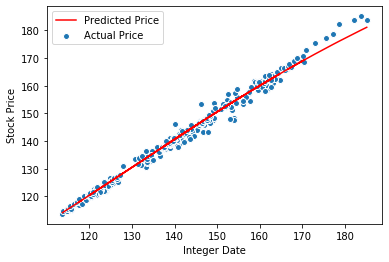

In [64]:
plt.scatter(x_test_lstm, y_test_lstm, edgecolor='w', label='Actual Price')
plt.plot(x_test_lstm, test_pred_lstm, color='r', label='Predicted Price')
#plt.plot(test_pred_lstm, color='r', label=' Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [65]:
x_test_lstm

array([[113.66000366],
       [113.69999695],
       [114.63999939],
       [114.76999664],
       [115.62000275],
       [115.66999817],
       [115.66999817],
       [115.86000061],
       [115.76999664],
       [115.63999939],
       [114.94999695],
       [115.37999725],
       [115.73999786],
       [115.54000092],
       [116.41000366],
       [117.12000275],
       [117.13999939],
       [118.08999634],
       [117.68000031],
       [117.54000092],
       [117.79000092],
       [117.52999878],
       [117.05999756],
       [117.87000275],
       [118.15000153],
       [117.43000031],
       [119.23999786],
       [118.72000122],
       [120.01999664],
       [119.66000366],
       [120.56999969],
       [121.05999756],
       [121.25      ],
       [121.33000183],
       [122.43000031],
       [121.44000244],
       [121.86000061],
       [121.52999878],
       [122.30999756],
       [121.58999634],
       [121.80000305],
       [122.08999634],
       [121.87999725],
       [122

In [66]:
y_test_lstm

array([[113.69999695],
       [114.63999939],
       [114.76999664],
       [115.62000275],
       [115.66999817],
       [115.66999817],
       [115.86000061],
       [115.76999664],
       [115.63999939],
       [114.94999695],
       [115.37999725],
       [115.73999786],
       [115.54000092],
       [116.41000366],
       [117.12000275],
       [117.13999939],
       [118.08999634],
       [117.68000031],
       [117.54000092],
       [117.79000092],
       [117.52999878],
       [117.05999756],
       [117.87000275],
       [118.15000153],
       [117.43000031],
       [119.23999786],
       [118.72000122],
       [120.01999664],
       [119.66000366],
       [120.56999969],
       [121.05999756],
       [121.25      ],
       [121.33000183],
       [122.43000031],
       [121.44000244],
       [121.86000061],
       [121.52999878],
       [122.30999756],
       [121.58999634],
       [121.80000305],
       [122.08999634],
       [121.87999725],
       [122.26999664],
       [122

In [67]:
test_pred_lstm

array([[114.14442 ],
       [114.18355 ],
       [115.10555 ],
       [115.233376],
       [116.07091 ],
       [116.12027 ],
       [116.12027 ],
       [116.30793 ],
       [116.21902 ],
       [116.09065 ],
       [115.41047 ],
       [115.83412 ],
       [116.189384],
       [115.99195 ],
       [116.852   ],
       [117.556076],
       [117.57593 ],
       [118.52098 ],
       [118.112724],
       [117.97346 ],
       [118.2222  ],
       [117.96352 ],
       [117.49649 ],
       [118.30185 ],
       [118.58079 ],
       [117.86408 ],
       [119.66917 ],
       [119.14945 ],
       [120.45033 ],
       [120.08956 ],
       [121.002235],
       [121.49462 ],
       [121.68574 ],
       [121.766235],
       [122.8746  ],
       [121.87694 ],
       [122.299904],
       [121.96753 ],
       [122.75355 ],
       [122.02794 ],
       [122.23945 ],
       [122.5317  ],
       [122.32005 ],
       [122.7132  ],
       [122.55187 ],
       [121.454414],
       [121.887   ],
       [121.7

In [68]:
#results_lstm = model.evaluate(x_test_lstm, y_test_lstm, batch_size=128)
#print("test loss, test acc:", results_lstm)

### shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)-196:len(data)+100, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()


In [69]:
len(data_scaled)
data_scaled

array([[0.65253742],
       [0.6618393 ],
       [0.67443782],
       ...,
       [0.99646782],
       [0.98033677],
       [1.        ]])

In [70]:
#Predicting to next 1 day data using previous 7 days
x_input=data_scaled[len(data_scaled)-1:].reshape(1,-1)
x_input.shape

(1, 1)

In [71]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [72]:
len(temp_input)

1

In [73]:
temp_input

[1.0000000000000002]

In [74]:
x_input

array([[1.]])

In [75]:
from numpy import array

lst_output=[]
n_steps=1
i=0
while(i<7):
    
    if(len(temp_input)>1):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = final_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = final_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9522444]
2
1 day input [0.9522444]
1 day output [[0.91569]]
2 day input [0.91569]
2 day output [[0.8868026]]
3 day input [0.88680261]
3 day output [[0.86342067]]
4 day input [0.86342067]
4 day output [[0.8441399]]
5 day input [0.84413987]
5 day output [[0.8280043]]
6 day input [0.8280043]
6 day output [[0.8143379]]
[[0.9522444009780884], [0.915690004825592], [0.886802613735199], [0.8634206652641296], [0.8441398739814758], [0.8280043005943298], [0.8143379092216492]]


In [76]:
day_new=np.arange(1,len(lst_output)+1)
day_pred=np.arange(len(lst_output)+1,len(lst_output)+8)

In [77]:
len(day_new)

7

In [78]:
lst_output

[[0.9522444009780884],
 [0.915690004825592],
 [0.886802613735199],
 [0.8634206652641296],
 [0.8441398739814758],
 [0.8280043005943298],
 [0.8143379092216492]]

In [79]:
day_pred.shape

(7,)

In [80]:
tx = scaler.inverse_transform(lst_output)
tx

array([[181.37411   ],
       [178.2695454 ],
       [175.81613949],
       [173.83031078],
       [172.19279331],
       [170.82239918],
       [169.66171267]])

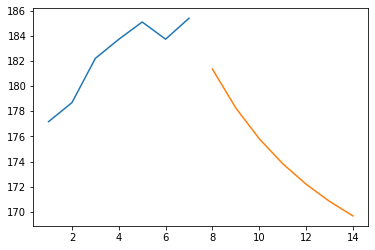

In [81]:
plt.plot(day_new,scaler.inverse_transform(data_scaled[len(data_scaled)-7:]))
plt.plot(day_pred,tx)

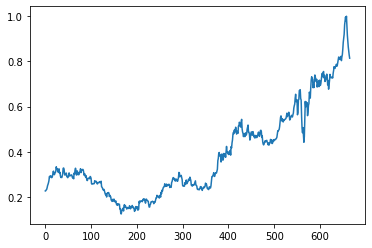

In [82]:
df3=data_scaled.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [83]:
df3=scaler.inverse_transform(df3).tolist()

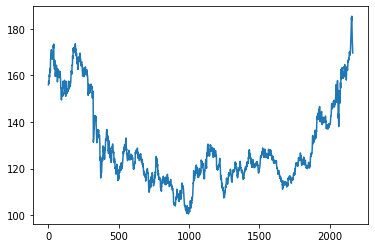

In [84]:
plt.plot(df3)

In [85]:
df3[-40:]

[[162.25],
 [162.55999755859375],
 [162.24000549316406],
 [164.02999877929688],
 [165.08999633789062],
 [166.47999572753906],
 [165.89999389648438],
 [165.8000030517578],
 [166.5399932861328],
 [166.6300048828125],
 [167.3699951171875],
 [166.6199951171875],
 [166.97999572753906],
 [167.97999572753906],
 [169.0399932861328],
 [170.08999633789062],
 [169.6300048828125],
 [169.19000244140625],
 [169.39999389648438],
 [170.19000244140625],
 [170.33999633789065],
 [168.72999572753906],
 [170.1199951171875],
 [170.94000244140622],
 [173.0],
 [175.63000488281253],
 [177.17999267578128],
 [178.69999694824222],
 [182.22999572753906],
 [183.75],
 [185.1300048828125],
 [183.75999450683594],
 [185.42999267578125],
 [181.37411000062275],
 [178.26954540312363],
 [175.81613948939412],
 [173.8303107770007],
 [172.19279331458165],
 [170.8223991849918],
 [169.66171266580568]]

In [86]:
#train_pred_lr = modellr.predict(x_train_lr)
#test_pred_lr = modellr.predict(x_test_lr)
#train_pred_lstm=model.predict(x_train_lstm)
#test_pred_lstm=model.predict(x_test_lstm)

In [87]:
print(train_pred_lr-y_train_lr)

[[-0.90230283]
 [-1.18475004]
 [ 0.46190704]
 ...
 [ 0.34104623]
 [ 0.02207566]
 [ 0.26210472]]


In [88]:
print(train_pred_lstm-x_train_lstm)

[[[155.61830609]
  [156.36110394]
  [157.36171429]
  ...
  [116.15984814]
  [115.83332531]
  [115.82342999]]

 [[155.60900421]
  [156.35180206]
  [157.35241241]
  ...
  [116.15054626]
  [115.82402343]
  [115.81412811]]

 [[155.59640569]
  [156.33920354]
  [157.33981389]
  ...
  [116.13794774]
  [115.81142492]
  [115.80152959]]

 ...

 [[156.08398369]
  [156.82678154]
  [157.82739189]
  ...
  [116.62552574]
  [116.29900292]
  [116.28910759]]

 [[156.08786927]
  [156.83066712]
  [157.83127747]
  ...
  [116.62941132]
  [116.30288849]
  [116.29299317]]

 [[156.08798703]
  [156.83078489]
  [157.83139524]
  ...
  [116.62952909]
  [116.30300626]
  [116.29311094]]]
